In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from scipy import stats
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
insurance = pd.read_csv('insurance_part2_data.csv')
insurance.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [3]:
insurance.shape

(3000, 10)

In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


## 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest

In [5]:
for feature in insurance.columns: 
    if insurance[feature].dtype == 'object': 
        insurance[feature] = pd.Categorical(insurance[feature]).codes

In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [7]:
X = insurance.drop("Claimed" , axis=1)

y = insurance.pop("Claimed")

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [10]:
rfcl = RandomForestClassifier(n_estimators = 1000, oob_score=True)

In [11]:
rfcl = rfcl.fit(X_train, train_labels)

In [12]:
rfcl.oob_score_

0.7528571428571429

In [13]:
random_state=[0,23,42]
for i in random_state:
    rf=RandomForestClassifier(random_state=i,oob_score=True)
    rf.fit(X_train,train_labels)
    print(rf.oob_score_)

0.758095238095238
0.7519047619047619
0.7542857142857143


In [14]:
rfcl.oob_score_

0.7528571428571429

In [15]:
rfcl = RandomForestClassifier(n_estimators = 1000, 
                              oob_score = True,
                             max_depth = 10,
                             max_features = 5,
                             min_samples_leaf = 50, 
                             min_samples_split = 120,
                             )

In [16]:
rfcl = rfcl.fit(X_train, train_labels)

In [17]:
rfcl.oob_score_

0.7828571428571428

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5,7,10],
    'max_features': [4,6],
    'min_samples_leaf': [5,10],
    'min_samples_split': [50,100],
    'n_estimators': [100,200,300]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)


In [19]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [5, 7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [50, 100],
                         'n_estimators': [100, 200, 300]})

In [20]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 50,
 'n_estimators': 100}

In [21]:
rfcl = RandomForestClassifier(n_estimators = 100, 
                              oob_score = True,
                             max_depth = 7,
                             max_features = 4,
                             min_samples_leaf = 5, 
                             min_samples_split = 50,
                             )

In [22]:
rfcl = rfcl.fit(X_train, train_labels)

In [23]:
rfcl.oob_score_

0.7876190476190477

In [24]:
print (pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Age           0.055972
Agency_Code   0.314935
Type          0.055641
Commision     0.118830
Channel       0.003199
Duration      0.084271
Sales         0.174075
Product Name  0.184725
Destination   0.008351


In [25]:
best_grid = grid_search.best_estimator_

In [26]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix,classification_report

In [28]:
confusion_matrix(train_labels,ytrain_predict)

array([[1326,  145],
       [ 248,  381]], dtype=int64)

## 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model.

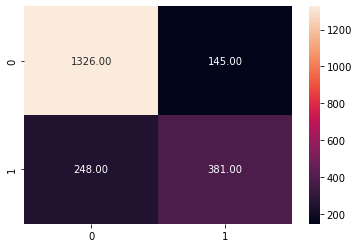

In [29]:
sns.heatmap(confusion_matrix(train_labels, ytrain_predict),annot=True,fmt='.2f');

In [30]:
accuracy_score(train_labels, ytrain_predict)

0.8128571428571428

In [31]:
confusion_matrix(test_labels,ytest_predict)

array([[549,  56],
       [148, 147]], dtype=int64)

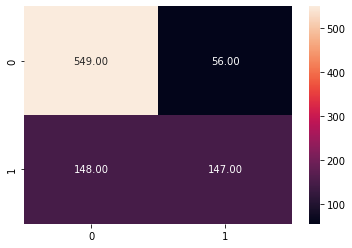

In [32]:
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True,fmt='.2f');

In [33]:
accuracy_score(test_labels,ytest_predict)

0.7733333333333333

In [34]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1471
           1       0.72      0.61      0.66       629

    accuracy                           0.81      2100
   macro avg       0.78      0.75      0.77      2100
weighted avg       0.81      0.81      0.81      2100



In [35]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       605
           1       0.72      0.50      0.59       295

    accuracy                           0.77       900
   macro avg       0.76      0.70      0.72       900
weighted avg       0.77      0.77      0.76       900



In [36]:
import matplotlib.pyplot as plt

AUC: 0.864


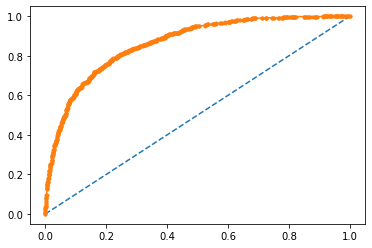

In [37]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.823


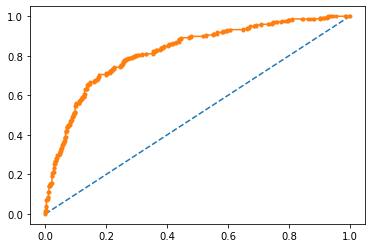

In [38]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [39]:
accuracy_score(train_labels,ytrain_predict)

0.8128571428571428

In [40]:
accuracy_score(test_labels,ytest_predict)

0.7733333333333333